<a href="https://colab.research.google.com/github/Ckaur012/Ckaur012/blob/main/hotel_booking_machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data- 
 In pandas we have two type of datastructure series and dataframe so here df is  2-D Data structure

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


## Preprocessing Data-
Data cleaning to perform data analysis

 #### check Missing Value
 #### check datastructure
 ####  Duplicate values

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

So we have missing value in Country, agent and Company

so to dealing with that missing value we can follow two approaches either to delete or to impute but in this case we have larger no of missing value so we have impute or fill with values like mean or median or any other no. depending on behavior of data.

In our case we can delete the company and agent because these are only ID Value

In [ ]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [ ]:
df.country.value_counts().index[0]

'PRT'

In [ ]:
df['country'].fillna(df.country.value_counts().index[0], inplace = True)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Remove Irrelevant Data

In [ ]:
filter1 = (df['children']== 0) & (df['adults']== 0) & (df['babies']== 0)

In [ ]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
data = df[~filter1]

In [ ]:
data.shape

(119210, 30)

In [ ]:
df.shape

(119390, 30)

Now We have to explore more Data Analysis to understand about Data.

So, First we have to check how many Cancellation done in this hotel booking.

In [ ]:
data['is_canceled'].unique()

array([0, 1])

In [ ]:
data[data['is_canceled']==0]['country'].value_counts()

PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 165, dtype: int64

In [ ]:
len(data[data['is_canceled']==0])

75011

In [ ]:
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

so, now in this we can check in percent form how many booking has made by each country, now lets converts this into a Data frame

In [ ]:
country_wise_data =data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [ ]:
country_wise_data.columns = ['country', 'no_of_guest']
country_wise_data

,country,no_of_guest
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [ ]:
import plotly.express as px

In [ ]:
country_wise_data

,country,no_of_guest
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guest'],
              hover_name=country_wise_data['country'],
              title='home country of guests'
             )
             

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['country', 'no_of_guest'] but received: 0      PRT
1      GBR
2      FRA
3      ESP
4      DEU
      ... 
160    BHR
161    DJI
162    MLI
163    NPL
164    FRO
Name: country, Length: 165, dtype: object

In [ ]:
map_guest

### Problem Statment- 
 How much do guest pay per night?

In [ ]:
data2 = data[data['is_canceled']==0]

In [ ]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'Price')

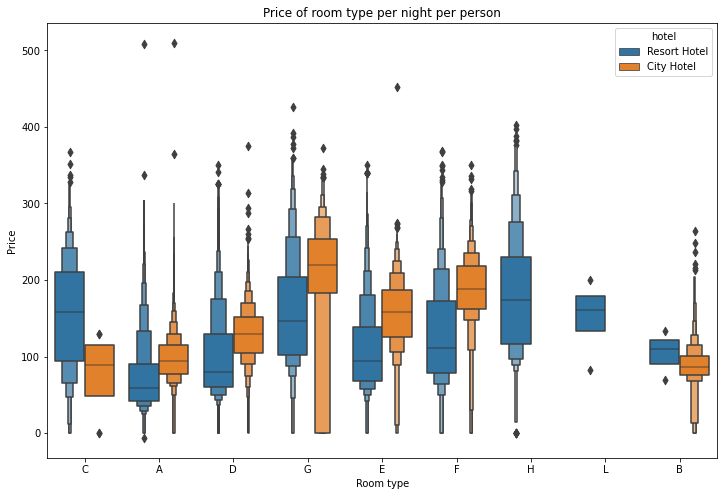

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='reserved_room_type', y= 'adr', hue= 'hotel', data=data2)
plt.title('Price of room type per night per person')
plt.xlabel('Room type')
plt.ylabel('Price')

So,  by looking at this box-plot we make inference as in case of City Hotel G category performing well and in case of Resort hotel H category performing good.

### Problem Statement-

Which are the most busy months?

In [ ]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data_resort= data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city= data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [ ]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [ ]:
resort_rush = data_resort['arrival_date_month'].value_counts().reset_index()
resort_rush.columns = ['Month', 'No_of_guest']
resort_rush

,Month,No_of_guest
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
city_rush = data_city['arrival_date_month'].value_counts().reset_index()
city_rush.columns = ['Month', 'No_of_guest']
city_rush

,Month,No_of_guest
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
final_rush= resort_rush.merge(city_rush, on='Month')

In [ ]:
final_rush.columns = ['Month', 'No_of_guest_resort', 'No_of_guest_city']

In [ ]:
final_rush

,Month,No_of_guest_resort,No_of_guest_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
#!pip install sorted-months-weekdays

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=4a1b096a9adbf5e8410d0275287c0f04740a702b0d5c04cfd9a2d695b2790667
  Stored in directory: /Users/charanjeetkaur/Library/Caches/pip/wheels/2a/70/02/2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays


In [ ]:
#!pip install sort-dataframeby-monthorweek

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=ae98e9aa265d6cc49a49e8059fecef224ae642ff97805c6b9b3fef6521a04ade
  Stored in directory: /Users/charanjeetkaur/Library/Caches/pip/wheels/94/66/fa/f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort-dataframeby-monthorweek


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
final_rush = sd.Sort_Dataframeby_Month(final_rush,'Month')

In [ ]:
final_rush.columns

Index(['Month', 'No_of_guest_resort', 'No_of_guest_city'], dtype='object')

TypeError: plot got an unexpected keyword argument 'x'

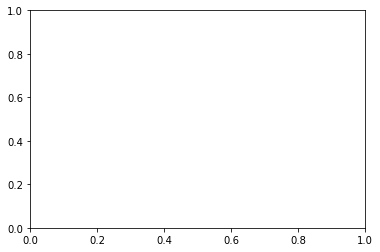

In [ ]:
plt.plot(final_rush, x ='Month', y= ['No_of_guest_resort', 'No_of_guest_city'])